# 로지스틱 회귀(Logistic Regression)<br>

로지스틱 회귀는 이진 분류를 하는데 있어 유용한 방법이다.<br><br>
선형회귀로 특정 값을 기준으로 나누기만 하면 이진 분류 가능하지 않나? 라는 의문이
떠올랐는데, 선형회귀는 y값이 음의 무한대부터 양의 무한대와 같은 큰 수도 가질 수 있어서 분류에 적합하지 않다.<br><br>
로지스틱 회귀는 0 혹은 1의 최종값을 출력하는데, 각각의 값에 해당할 '확률'을 구하는 관점으로 접근한다. 확률이 50%보다 크면 1, 아니면 0 이런식.<br><br>
이런 확률값을 구하기 위해 적절한 함수가 바로
## 시그모이드 함수(Sigmoid function)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

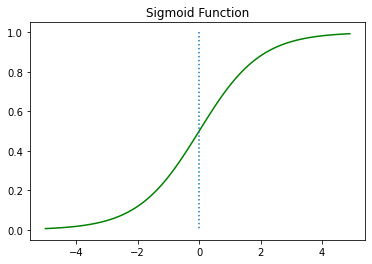

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)

plt.plot(x, y1, 'g')
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

## <br>가중치 w를 변화시키면..

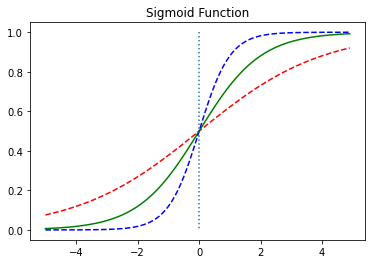

In [3]:
y2_1 = sigmoid(0.5*x)
y2_2 = sigmoid(x)
y2_3 = sigmoid(2*x)

plt.plot(x, y2_1, 'r', linestyle='--')
plt.plot(x, y2_2, 'g')
plt.plot(x, y2_3, 'b', linestyle='--')
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

## <br>편향 b값을 변화시키면..

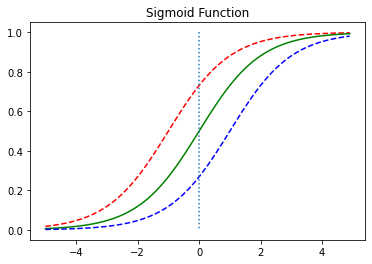

In [4]:
y3_1 = sigmoid(x+1.0)
y3_2 = sigmoid(x)
y3_3 = sigmoid(x-1.0)

plt.plot(x, y3_1, 'r', linestyle='--')
plt.plot(x, y3_2, 'g')
plt.plot(x, y3_3, 'b', linestyle='--')
plt.plot([0, 0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

위의 그래프로부터 클래스를 분류하는 기준을 편향치로 조절할 수 있다는 사실을 알 수 있다.

## <br>비용 함수(Cost function)

로지스틱 회귀 또한 경사 하강법을 이용해 가중치 W를 찾아내지만, 비용 함수로 평균 제곱 오차를 사용하지 않는다. 로컬미니멈에 빠질 위험이 존재하기 때문.<br>
대신 다음 함수를 사용한다.
<br><br>$J(W) = -{1 \over n}\sum_{i=1}^n [y^{i}logH(x^{i})+(1-y^{i})log(1-H(x^{i})]$<br>
<br>간단히 설명하면, 실제값이 1일 때 예측값 H(X)의 값이 1이면 오차가 0이므로 cost는 0이 된다. 반대로, 실제값이 1일 때 H(X)가 0으로 수렴하면 cost는 무한대로 발산한다. 실제값이 0일 때도 생각해보자.<br>
더불어 위 함수의 이름은 크로스 엔트로피(Cross Entropy)함수라고 하며, 이후 나올 소프트맥스 회귀의 비용 함수이기도 하다.

정리 :<br>
선형회귀에서는 활성화함수로 선형 함수를, 비용 함수로 보통 평균제곱오차 사용.<br>
로지스틱에서는 활성화함수로 시그모이드를, 비용 함수로 크로스엔트로피 사용.

## <br>케라스로 구현하는 로지스틱 회귀

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [6]:
X = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(X, y, batch_size=1, epochs=200, shuffle=False, verbose = 0)

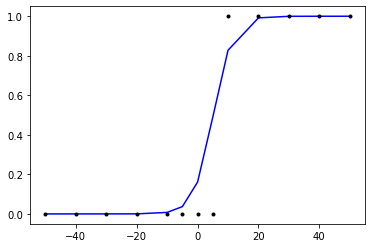

In [7]:
plt.plot(X, model.predict(X), 'b', X, y, 'k.')